# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Rifal Ariya Yusuftrian]
- **Email:** [rifalariya13@gmail.com]
- **ID Dicoding:** [lleenn]

## Menentukan Pertanyaan Bisnis

- Apakah faktor musim mempengaruhi peminjaman sepeda?
- Hari apa yang paling banyak melakukan peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data dari folder data dan memberi namanya dengan nama days_df untuk data day.csv dan hours_df untuk data hour.csv

### Assessing Data

### Data days_df

In [5]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Data hours_df

In [9]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- days_df : Terdapat kesalahan tipe data untuk kolom dteday 
- hours_df : Terdapat kesalahan tipe data untuk kolom dteday

Akan ada beberapa kolom yang diubah namanya agar mempermudah dan memperjelas isi dari data tersebut. Selain itu juga akan merubah type data dari beberapa kolom selain 2 diatas menjadi tipe category guna memperjelas informasi dari data tersebut.
Selanjutnya untuk kolom instant dan kolom atemp akan dihapus karena dirasa data tersebut tidak terlalu terpakai untuk dianalisis lebih lanjut.

### Cleaning Data

In [13]:
days_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','weathersit':'weather', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
hours_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'hum': 'humidity','weathersit':'weather', 'cnt': 'count'}, inplace=True)

### days_df

In [15]:
# Mengganti tipe data dari dteday

days_df['date'] = pd.to_datetime(days_df['date'])

In [17]:
# Merubah tipe data
days_df['season'] = days_df.season.astype('category')
days_df['year'] = days_df.year.astype('category')
days_df['month'] = days_df.month.astype('category')
days_df['holiday'] = days_df.holiday.astype('category')
days_df['weekday'] = days_df.weekday.astype('category')
days_df['workingday'] = days_df.workingday.astype('category')
days_df['weather'] = days_df.weather.astype('category')

### Membuat list category

In [18]:
days_df['weekday'] = days_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
days_df['month'] = days_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mrch', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Agst', 9:'Sptmbr', 10:'Octbr', 11:'Nvmbr', 12:'Dcmbr'
})
days_df['year'] = days_df['year'].map({
    0: 2011, 1: 2012
})
days_df['season'] = days_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
days_df['weather'] = days_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [32]:
days_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
days_df.describe()

,date,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### hours_df

In [22]:
# Mengganti tipe data dari dteday

hours_df['date'] = pd.to_datetime(hours_df['date'])

In [23]:
# Merubah tipe data
hours_df['season'] = hours_df.season.astype('category')
hours_df['year'] = hours_df.year.astype('category')
hours_df['month'] = hours_df.month.astype('category')
hours_df['holiday'] = hours_df.holiday.astype('category')
hours_df['weekday'] = hours_df.weekday.astype('category')
hours_df['workingday'] = hours_df.workingday.astype('category')
hours_df['weather'] = hours_df.weather.astype('category')

### Membuat list category

In [24]:

hours_df['weekday'] = hours_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hours_df['month'] = hours_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mrch', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Agst', 9:'Sptmbr', 10:'Octbr', 11:'Nvmbr', 12:'Dcmbr'
})
hours_df['year'] = hours_df['year'].map({
    0: 2011, 1: 2012
})
hours_df['season'] = hours_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hours_df['weather'] = hours_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [25]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [30]:
hours_df.describe()

,instant,date,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Drop kolom yang tidak perlu

In [33]:
days_df.drop('instant', axis=1, inplace=True)

KeyError: "['instant'] not found in axis"

In [34]:
hours_df.drop('instant', axis=1, inplace=True)

In [37]:
days_df.describe()
hours_df.describe()

,date,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [39]:
days_df.to_csv("cleaned_days_df.csv", index=False)

In [40]:
hours_df.to_csv("cleaned_hours_df.csv", index=False)

**Insight:**

Mengganti tipe data dari kolom dteday dari kedua data menjadi date lalu merubah tipe data seasons, year, month, holiday, weekday, workingday dan weather menjadi category serta membuat list categorynya agar sesuai dengan keterangan data masing-masing. Selain itu melalukan dropping ke kolom instant karena dinilai tidak terlalu penting dalam analisis data.

Selanjutnya karena kedua data tersebut seidentik dan untuk menjawab kedua pertanyaan bisnis maka untuk sesi explor data akan lebih berfokus pada data days_df

## Exploratory Data Analysis (EDA)

### Explore 

In [35]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [45]:
hours_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012.0,May,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Peminjaman Sepeda berdasarkan musim

In [42]:
days_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1622808346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

#### Faktor lain dari musim

In [43]:
days_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1162125239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='season').agg({


temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Fall    0.360000  0.633482  
Winter  0.333478  0.668719

#### Peminjaman sepeda berdasarkan hari

In [44]:
days_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1124946305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

#### Peminjaman sepeda pada hari kerja dan libur

In [46]:
days_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\4194285191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Insight:**

Data yang dibutuhkan untuk menjawab pertanyaan sudah didapatkan selanjutnya tinggal membuatkan visual datanya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah faktor musim mempengaruhi peminjaman sepeda?

In [53]:
seasonly_df = days_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

seasonly_df.head().sort_values('count')

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1462624490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonly_df = days_df.groupby("season").agg({


,casual,registered,count
season,,,
Spring,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1821217360.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=days_df.groupby("season").agg({


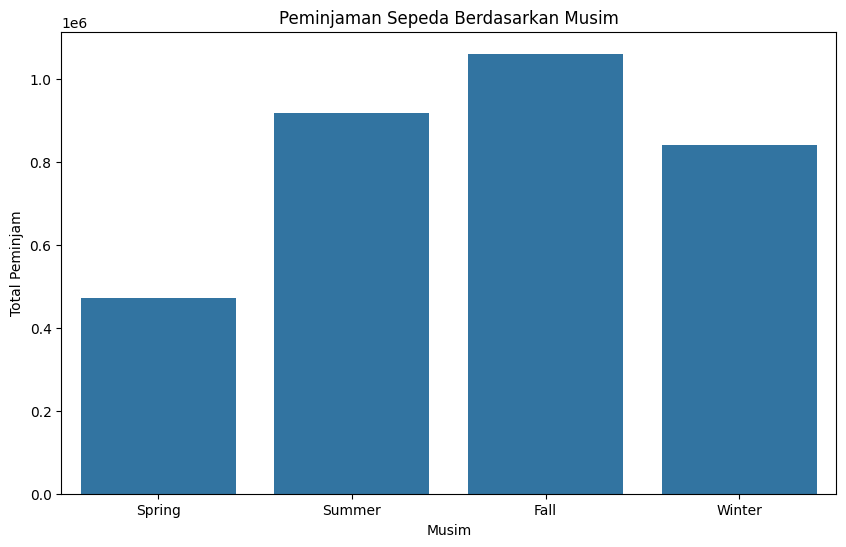

In [55]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="season", 
    y="count", 
    data=days_df.groupby("season").agg({
        "casual": "sum",
        "registered": "sum",
        "count": "sum"
    }).reset_index().sort_values(by='count')
)


plt.xlabel("Musim",)
plt.ylabel("Total Peminjam")
plt.title("Peminjaman Sepeda Berdasarkan Musim", size=12)

plt.show()

### Pertanyaan 2: - Hari apa yang paling banyak melakukan peminjaman sepeda?

In [56]:
days_users_df = days_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

days_users_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\588254424.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_users_df = days_df.groupby("weekday").agg({


,casual,registered,count
weekday,,,
Sun,140521,303506,444027
Mon,70784,384719,455503
Tue,57843,411266,469109
Wed,57319,415729,473048
Thu,61460,423935,485395


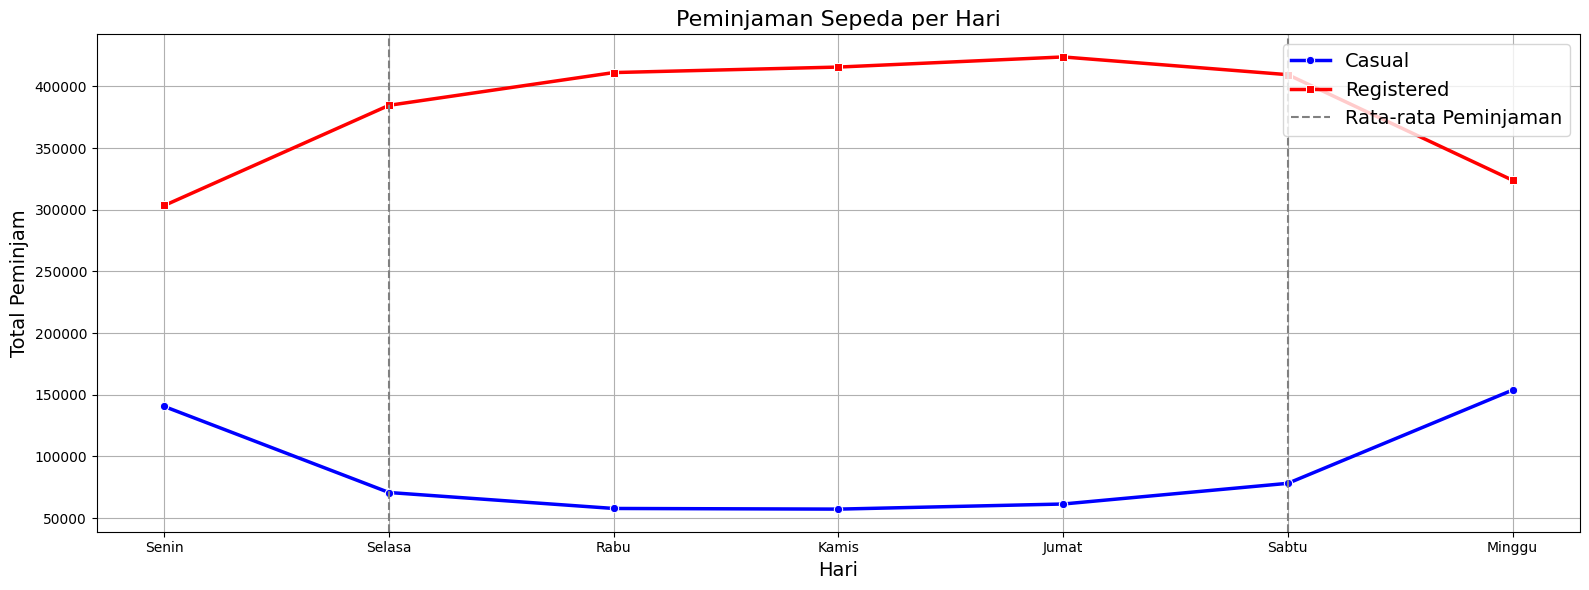

In [62]:
plt.figure(figsize=(16, 6))

# Menambahkan lineplot untuk pengguna casual dan registered dengan marker
sns.lineplot(x="weekday", y="casual", data=days_users_df, label='Casual', marker='o', color='blue', linewidth=2.5)
sns.lineplot(x="weekday", y="registered", data=days_users_df, label='Registered', marker='s', color='red', linewidth=2.5)

# Menyesuaikan sumbu x untuk menampilkan label hari dengan jelas
plt.xticks(np.arange(0, 7, 1), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

plt.xlabel("Hari", fontsize=14)
plt.ylabel("Total Peminjam", fontsize=14)
plt.title("Peminjaman Sepeda per Hari", fontsize=16)

# Garis vertikal untuk menunjukkan waktu tertentu
plt.axvline(x=1, color='gray', linestyle='--', label='Rata-rata Peminjaman')
plt.axvline(x=5, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.grid(True)  
plt.tight_layout()
plt.show()

**Insight:**

Pertanyaan 1 : 
Dari analisis data di atas, terlihat bahwa musim sangat mempengaruhi jumlah peminjaman sepeda. Musim Fall dan Summer menunjukkan peminjaman sepeda yang signifikan, kemungkinan dipengaruhi oleh faktor cuaca yang lebih baik dan aktivitas luar ruangan yang lebih banyak.

Pertanyaan 2 :
Berdasarkan data peminjaman sepeda, kita dapat melihat menyimpulkan bahwa hari dengan Peminjaman Tertinggi adalah hari Kamis (Thu) dengan memiliki total peminjaman sejumlah 485,395 peminjam.

## Analisis Lanjutan (Opsional)

### Data Peminjam Perjam

C:\Users\HP\AppData\Local\Temp\ipykernel_16196\1551210819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hours_df, x='hour', y='count', palette='viridis')


NameError: name 'st' is not defined

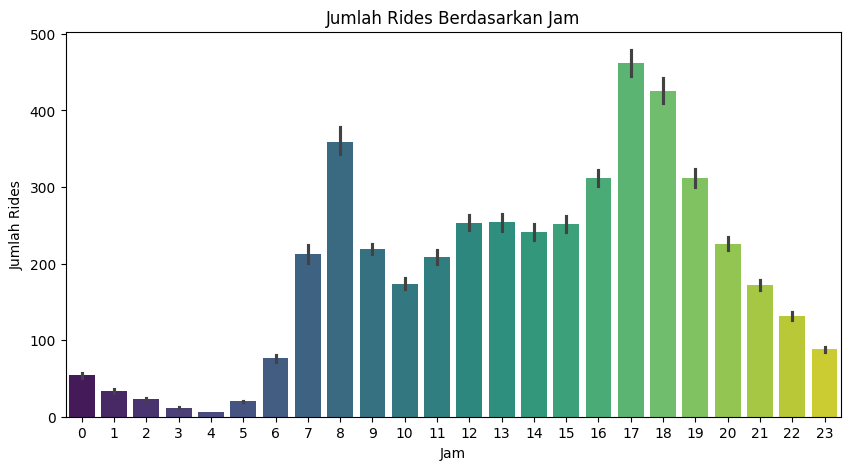

In [68]:
# Visualisai untuk data peminjam perjam
hours_users_df = hours_df.groupby('hour')['count'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=hours_df, x='hour', y='count', palette='viridis')
plt.title('Jumlah Rides Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rides')
st.pyplot(plt)

## Conclusion

- Conclution pertanyaan 1

  Apakah faktor musim mempengaruhi peminjaman sepeda?
  
1. Musim dengan Peminjaman Tertinggi: Musim Fall (musim gugur) memiliki total peminjaman tertinggi dengan 1,061,129 peminjam.

2. Perbandingan Musim:
    Summer (musim panas) juga menunjukkan angka yang tinggi dengan 918,589 peminjam, menjadikannya musim kedua dengan peminjaman tertinggi.
    Winter (musim dingin) dan Spring (musim semi) memiliki total peminjaman yang lebih rendah, dengan 841,613 dan 471,348 peminjam.

3. Dominasi Pengguna Registered: Di setiap musim, jumlah peminjam registered jauh lebih tinggi dibandingkan dengan peminjam casual. Misalnya, pada musim Fall, jumlah peminjam registered mencapai 835,038, sementara peminjam casual hanya 226,091.

4. Faktor Musim: Dari analisis di atas, terlihat bahwa musim sangat mempengaruhi jumlah peminjaman sepeda. Musim Fall dan Summer menunjukkan peminjaman yang signifikan, kemungkinan dipengaruhi oleh faktor cuaca yang lebih baik dan aktivitas luar ruangan yang lebih banyak.


- Conclution pertanyaan 2

Hari apa yang paling banyak melakukan peminjaman sepeda?

1. Berdasarkan data peminjaman sepeda, kita dapat melihat menyimpulkan bahwa hari dengan Peminjaman Tertinggi adalah hari Kamis (Thu) dengan memiliki total peminjaman sejumlah 485,395 peminjam.

2. Peminjam Casual dan Registered: Pada hari Kamis, terdapat 61,460 peminjam casual dan 423,935 peminjam terdaftar. Ini menunjukkan bahwa pada hari Kamis, pengguna terdaftar jauh lebih mendominasi jumlah peminjaman dibandingkan dengan pengguna casual.

3. Pola Umum: Secara keseluruhan, peminjaman sepeda cenderung meningkat seiring berjalannya minggu, dengan hari Minggu (Sun) sebagai hari dengan peminjaman tertinggi untuk kategori casual, tetapi hari Kamis memiliki total peminjaman yang lebih tinggi karena jumlah pengguna terdaftar yang banyak.